In [4]:
from freecond_src.freecond_utils import get_pipeline_forward
from freecond_src.freecond import FC_config
from freecond_src.freecond_optimizer import FCOptimizer
from diffusers import DDIMScheduler
from PIL import Image
import torch

torch.cuda.set_device(0)
pipeline, forward = get_pipeline_forward(method="sd",variant="sd15")

❗❗❗ Be sure using correct python environment, the python environment are different for methods 
🔄 Building Stable-Diffusion-Inpainting FreeCond control...
# Load backbone model
## Load backbone model = Stable Diffusion Inpainting 1.5


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]/nfs/home/bluedyee/miniconda3/envs/freecond/lib/python3.9/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Loading pipeline components...:  29%|██▊       | 2/7 [00:02<00:06,  1.28s/it]/nfs/home/bluedyee/miniconda3/envs/freecond/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Loading

Predict parameters:  {'fg': 1.2838266643983345, 'bg': 0.5792141097938163, 'fqth': 9.773863488498318}
Predict score:  58.16758178174496
Predict metrics:  {'Image Reward': -0.4977651834487915, 'HPS V2.1': 0.23873496055603027, 'PSNR': 25.497535705566406, 'LPIPS': 0.06091007962822914, 'CLIP Similarity': 20.192546844482422, 'IoU Score': 0.36841070652008057, 'DINO': 0.945835530757904}


100%|██████████| 50/50 [00:01<00:00, 36.86it/s]


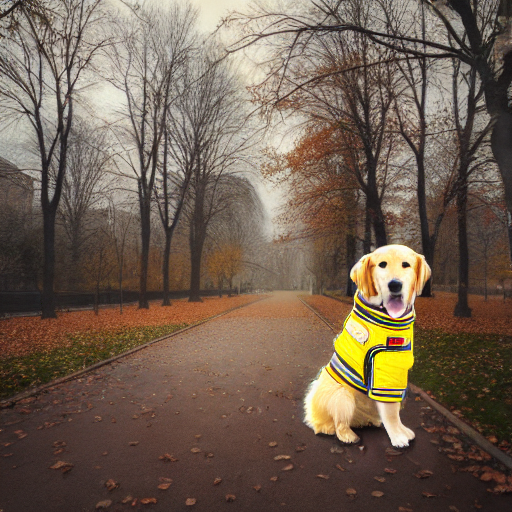

In [ ]:
metric_list=[
    "Image Reward",
    "HPS V2.1",
    "PSNR",
    "LPIPS",
    "CLIP Similarity",
    "IoU Score",
    "DINO",
]
optimizer = FCOptimizer(metric_list, pretrained_path="gp_model.pkl")
result = optimizer.optimize({
    "HPS V2.1": 100,
    "CLIP Similarity": 2,
    "LPIPS":-100
}, n_calls=30)
print("Predict parameters: ", result["best_params"])
print("Predict score: ", result["best_score"])
print("Predict metrics: ", result["best_output"])


fc_control = FC_config(
    change_step=25,
    fg_1=result["best_params"]["fg"],
    fg_2=result["best_params"]["fg"],
    bg_1=result["best_params"]["bg"],
    bg_2=result["best_params"]["bg"],
    hq_1=0,
    hq_2=1,
    fq_th=int(result["best_params"]["fqth"]),
)

mask = Image.open("./demo_data/mask_1_2.png").convert("L").resize((512, 512))
init_image = Image.open("./demo_data/img_1_2.jpg").convert("RGB").resize((512, 512))
prompt = "A golden retriever wearing astronaut gear, in cyberpunk style"
nprompt = "word, bad quality, bad anatomy, ugly, mutation, blurry, error"

default_out = forward(
    fc_control,
    init_image=init_image,
    mask_image=mask,
    prompt=prompt,
    negative_prompt=nprompt,
)
default_out[0]